# 作業

使⽤ SIFT 來抽取特徵

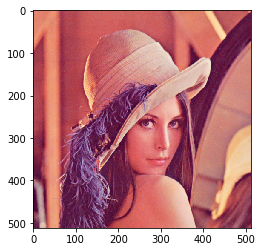

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
IMG_PATH = "Part01/lena.png"

img = cv2.imread(IMG_PATH,cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

keypoints_grey #=1098


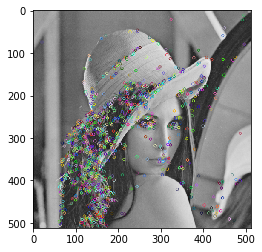

In [80]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift =  cv2.xfeatures2d.SIFT_create() # 建立 SIFT 物件
keypoints_grey = sift.detect(img_gray,None) # 抽取關鍵點
img_show = cv2.drawKeypoints(img_gray, keypoints,np.array([]))
print("keypoints_grey #={}".format(len(keypoints_grey)))
figure = plt.figure(1)
ax = figure.add_subplot(111)
ax.imshow(img_show)

keypoints_color #=1098


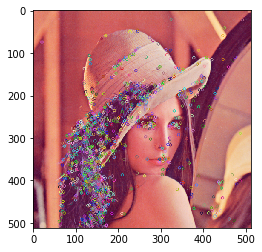

In [81]:

keypoints_color = sift.detect(img,None) # 抽取關鍵點
img_show = cv2.drawKeypoints(img, keypoints,np.array([]))
print("keypoints_color #={}".format(len(keypoints_color)))
figure = plt.figure(1)
ax = figure.add_subplot(111)
ax.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

In [90]:
pt_grey = [kp.pt for kp in keypoints_grey]
pt_color = [kp.pt for kp in keypoints_color]

like_count=0
for i in range(len(keypoints_grey)):
    for j in range(len(keypoints_color)):
        dist_x = abs(keypoints_grey[i].pt[0]-keypoints_color[j].pt[0])
        dist_y = abs(keypoints_grey[i].pt[1]-keypoints_color[j].pt[1])
        if (dist_x + dist_y) <0.8:
            like_count = like_count+1
#             print("keypoints_grey[{}] is like keypoints_color[{}] w/ dist={}".format(i, j, dist_x+dist_y ))
            
print("{:.3%} is alike".format(like_count/len(keypoints_grey)))           

131.512% is alike
